# 1. Загрузка данных

In [948]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [949]:
# Настройка отображения графиков
%matplotlib inline

data_path = Path("data/cian_rentals_clean.csv")

df = pd.read_csv(data_path)

print(f"Загружено записей: {len(df)}")

Загружено записей: 1349


In [950]:
df

,price_per_month,metro_nearest_time,total_area,floor,has_bath_flg,has_shower_flg,has_internet_flg,has_ac_flg,has_room_furniture_flg,has_kitchen_furniture_flg,has_dishwasher_flg,has_washer_flg,has_tv_flg,has_fridge_flg,utility_fixed_bill,utility_usage_bill_flg,utility_counters_extra_flg,deposit,comission,prepayment_months_cnt,rent_term_months_cnt,combined_bathrooms_cnt,separate_bathrooms_cnt,repair_cat,freight_elevators_cnt,passenger_elevators_cnt,parking_cat,heating_cat,balcony_cnt,loggia_cnt,has_garbage_chute_flg,has_concierge_flg,entrances_cnt,individual_project_flg,era_cat,house_type_monolithic_flg,house_type_monolithic_brick_flg,house_type_panel_flg,district_krasnogvardeysky_flg,district_krasnoselsky_flg,district_moskovsky_flg,district_nevsky_flg,district_other_flg,district_primorsky_flg,district_vyborgsky_flg
0,55000,1,35.0,0.52,0,1,1,0,1,1,1,1,1,1,10000,0,0,27500,0.5,1,12,1,0,2,1,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,200000,19,200.0,0.80,0,0,0,0,0,0,0,0,0,0,0,0,1,200000,0.5,0,12,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,20500,4,15.0,0.25,0,1,1,0,1,1,0,1,1,1,5500,0,1,20500,1.0,1,12,1,0,1,0,0,0,1,0,0,0,0,3,1,1,0,0,0,0,0,0,0,1,0,0
3,33990,11,22.0,0.73,1,1,1,0,1,1,1,1,1,1,3500,0,1,34000,0.0,1,3,1,0,2,2,2,2,0,0,1,0,0,0,0,4,1,0,0,0,0,0,0,0,0,1
4,44000,3,24.0,0.56,1,0,1,1,1,1,1,1,1,1,0,1,1,44000,0.0,0,3,0,0,0,1,1,1,0,0,1,0,0,0,0,4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,35000,16,40.0,0.77,0,1,1,0,1,1,0,1,1,1,0,1,1,35000,1.0,1,12,1,0,3,2,2,1,0,0,1,0,0,0,0,4,1,0,0,0,0,1,0,0,0,0
1345,30000,5,32.0,0.50,1,0,1,0,1,1,0,1,0,1,5500,0,1,30000,0.7,1,12,0,1,1,0,1,1,1,0,1,0,0,4,0,2,0,0,1,0,0,0,0,1,0,0
1346,32000,15,36.0,0.60,1,0,0,0,1,1,0,1,0,1,4000,0,1,32000,0.7,1,12,1,0,2,1,0,1,1,0,1,0,0,15,1,4,1,0,0,0,0,1,0,0,0,0
1347,33000,11,25.0,0.50,0,1,1,0,1,1,1,1,1,1,3000,0,1,30000,0.0,1,3,1,0,2,1,1,1,0,0,1,0,0,0,1,4,0,1,0,0,0,0,0,0,1,0


In [951]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_per_month                  1349 non-null   int64  
 1   metro_nearest_time               1349 non-null   int64  
 2   total_area                       1349 non-null   float64
 3   floor                            1349 non-null   float64
 4   has_bath_flg                     1349 non-null   int64  
 5   has_shower_flg                   1349 non-null   int64  
 6   has_internet_flg                 1349 non-null   int64  
 7   has_ac_flg                       1349 non-null   int64  
 8   has_room_furniture_flg           1349 non-null   int64  
 9   has_kitchen_furniture_flg        1349 non-null   int64  
 10  has_dishwasher_flg               1349 non-null   int64  
 11  has_washer_flg                   1349 non-null   int64  
 12  has_tv_flg                     

### **💰 Финансовые показатели**

* `price_per_month`: Стоимость аренды в месяц.
* `deposit`: Сумма залога (депозита).
* `comission`: Комиссия агенту (в долях: например, 0.5 — это 50%).
* `prepayment_months_cnt`: Количество месяцев предоплаты при заезде.
* `utility_fixed_bill`: Фиксированная стоимость коммунальных платежей (если указана).
* `utility_usage_bill_flg`: Флаг, указывающий, что арендатор оплачивает эксплуатационные расходы (ЖКХ) отдельно.
* `utility_counters_extra_flg`: Флаг, указывающий, что счетчики (вода, свет) оплачиваются сверх аренды.

---

### **🏢 Характеристики квартиры и дома**

* `total_area`: Общая площадь квартиры (кв. м).
* `floor`: Этаж (в данном датасете представлен как **нормализованное значение**: отношение текущего этажа к общему числу этажей в доме).
* `rent_term_months_cnt`: Минимальный срок аренды в месяцах.
* `repair_cat`: Категория ремонта (уровень качества отделки).
* `era_cat`: Категория эпохи постройки (от дореволюционных до современных ЖК).
* `heating_cat`: Категория типа отопления.
* `individual_project_flg`: Флаг, указывающий на индивидуальный проект здания.
* `entrances_cnt`: Количество подъездов в доме.
* `house_type_..._flg`: Тип конструкции здания (бинарные флаги):
* `house_type_monolithic_flg`: Монолитный.
* `house_type_monolithic_brick_flg`: Кирпично-монолитный.
* `house_type_panel_flg`: Панельный.

---

### **📍 Расположение и Районы**

* `metro_nearest_time`: Время в пути до ближайшего метро (в минутах).
* `district_..._flg`: Принадлежность к административному району (One-Hot Encoding):
* `krasnogvardeysky`: Красногвардейский.
* `krasnoselsky`: Красносельский.
* `moskovsky`: Московский.
* `nevsky`: Невский.
* `primorsky`: Приморский.
* `vyborgsky`: Выборгский.
* `other`: Прочие районы.

---

### **🛁 Удобства и Санузлы**

* `combined_bathrooms_cnt`: Количество совмещенных санузлов.
* `separate_bathrooms_cnt`: Количество раздельных санузлов.
* `has_bath_flg`: Наличие ванны.
* `has_shower_flg`: Наличие душевой кабины.
* `balcony_cnt`: Количество балконов.
* `loggia_cnt`: Количество лоджий.

---

### **🛠 Инфраструктура и Оснащение**

* `passenger_elevators_cnt`: Количество пассажирских лифтов.
* `freight_elevators_cnt`: Количество грузовых лифтов.
* `parking_cat`: Категория доступности парковки.
* `has_garbage_chute_flg`: Наличие мусоропровода.
* `has_concierge_flg`: Наличие консьержа.

---

### **📺 Мебель и бытовая техника**

* `has_internet_flg`: Наличие интернета.
* `has_ac_flg`: Наличие кондиционера.
* `has_room_furniture_flg`: Наличие мебели в жилых комнатах.
* `has_kitchen_furniture_flg`: Наличие кухонного гарнитура.
* `has_dishwasher_flg`: Наличие посудомоечной машины.
* `has_washer_flg`: Наличие стиральной машины.
* `has_tv_flg`: Наличие телевизора.
* `has_fridge_flg`: Наличие холодильника.

# 2. Предварительный анализ данных
## 2.1. Цена аренды

In [968]:
def draw_hists(df, col):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title("Распределение")

    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[col]), kde=True, bins=50, color="green")
    plt.title("Log-распределение")
    plt.show()

    print("Топ 10:")
    display(df.sort_values(col, ascending=False).head(10)[[col]])


def draw_boxplot(df, col, title=""):
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(title)
    plt.show()

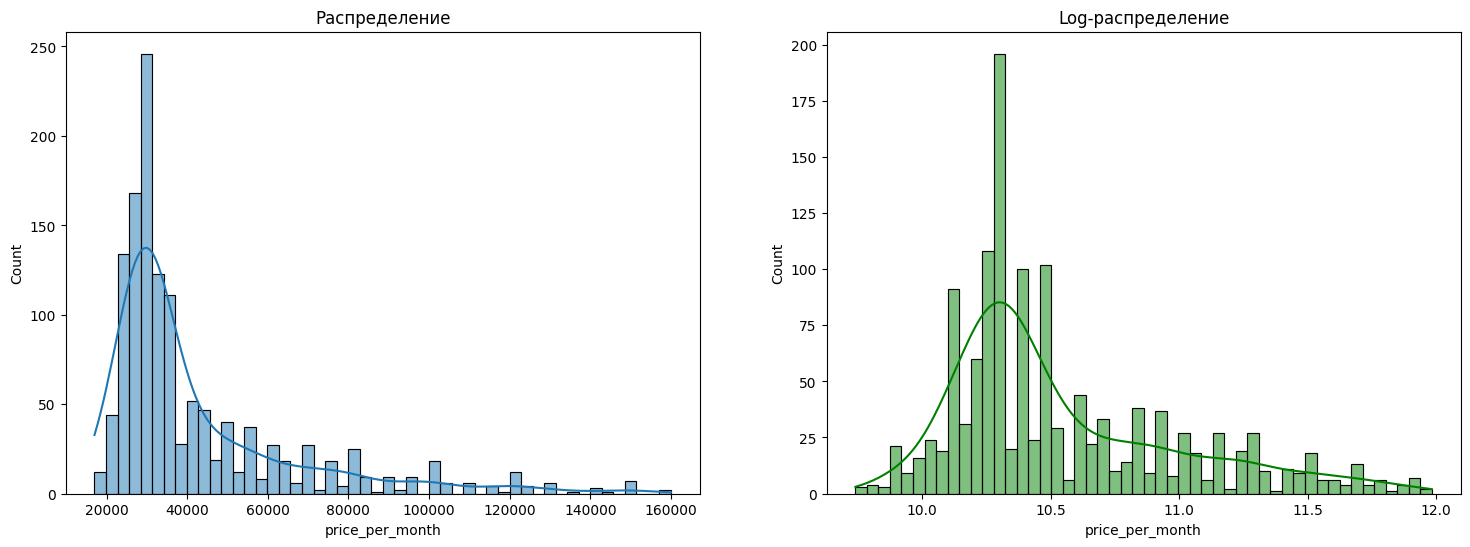

Топ 10:


,price_per_month
22,160000
502,160000
587,150000
584,150000
1213,150000
1222,150000
359,150000
499,150000
52,149900
1058,145000


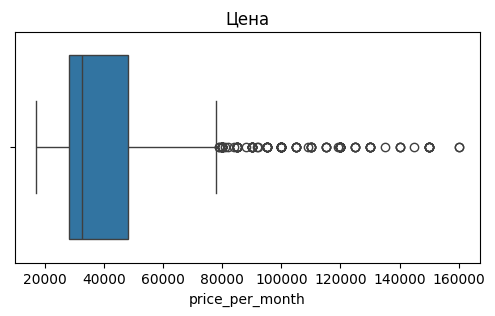

In [969]:
draw_hists(df, "price_per_month")
draw_boxplot(df, "price_per_month", "Цена")

In [954]:
def clip_by_percentile(df, col, a=0.99, b=None):
    # Если b не передан, значит a - это верхний порог
    if b is None:
        lower_p = 0.0
        upper_p = a
    else:
        lower_p = a
        upper_p = b

    lower = df[col].quantile(lower_p)
    upper = df[col].quantile(upper_p)

    return df[(df[col] >= lower) & (df[col] <= upper)].copy()

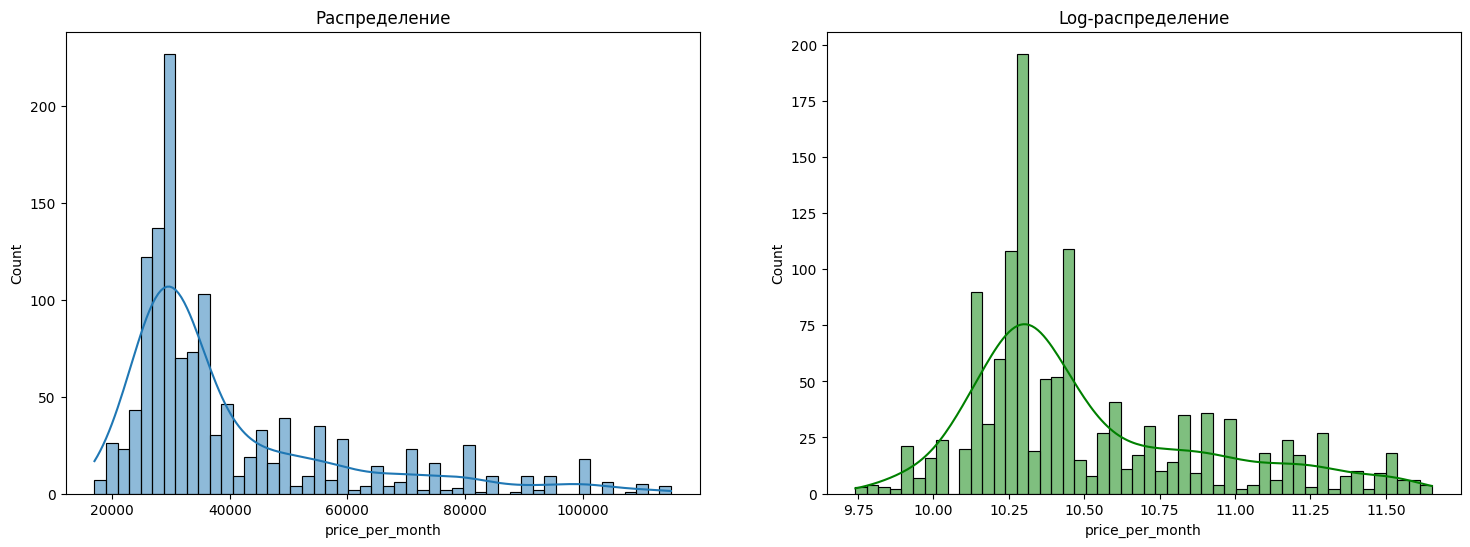

Топ 10:


,price_per_month
316,115000
190,115000
387,115000
1138,115000
355,110000
494,110000
1073,110000
1215,110000
1219,110000
168,109000


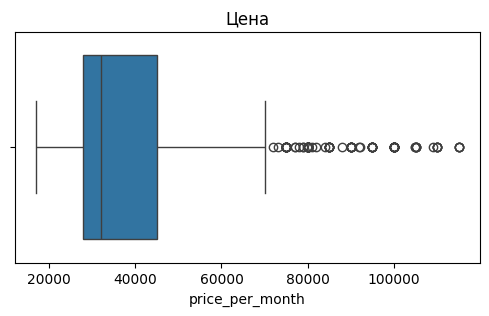

1309 1272


In [980]:
df_clean = clip_by_percentile(df, "price_per_month", 0.97)

draw_hists(df_clean, "price_per_month")
draw_boxplot(df_clean, "price_per_month", "Цена")
print(len(df), len(df_clean))

In [981]:
df = df_clean.copy()

## 2.2. Площадь жилья

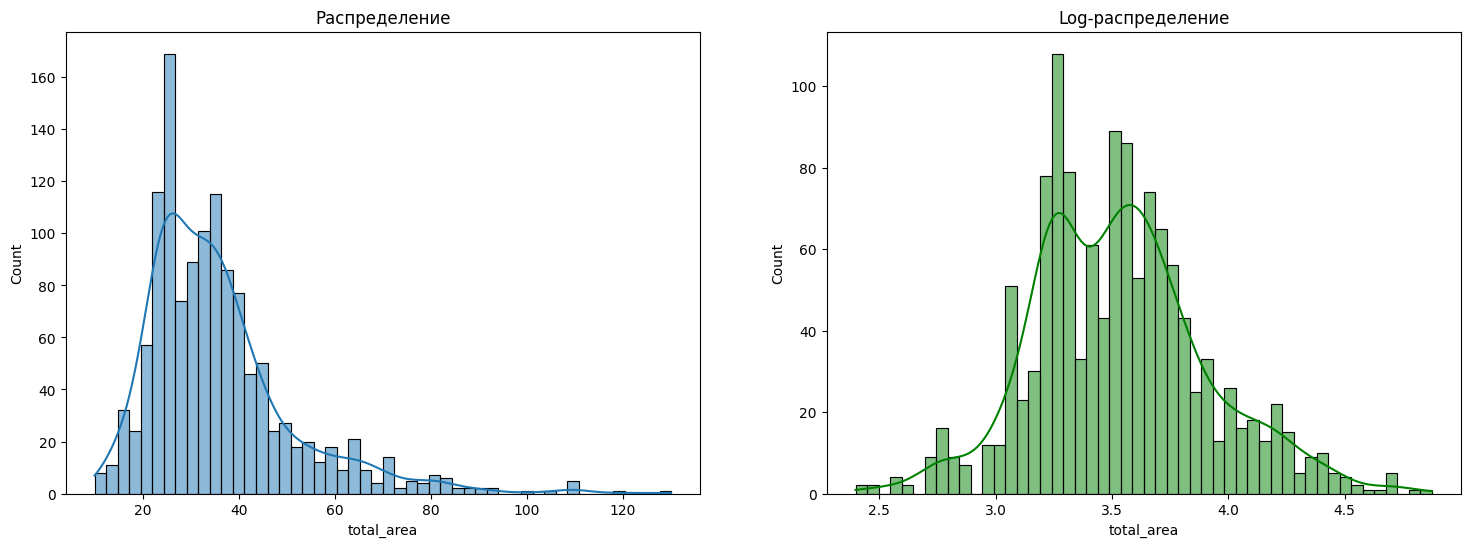

Топ 10:


,total_area
1124,130.0
1196,120.0
1219,110.0
578,110.0
581,110.0
226,110.0
310,109.0
1168,105.0
1203,100.0
190,93.0


In [982]:
draw_hists(df, "total_area")

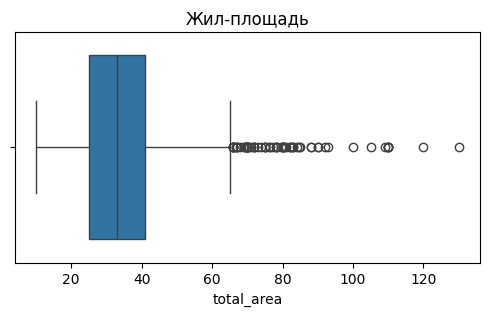

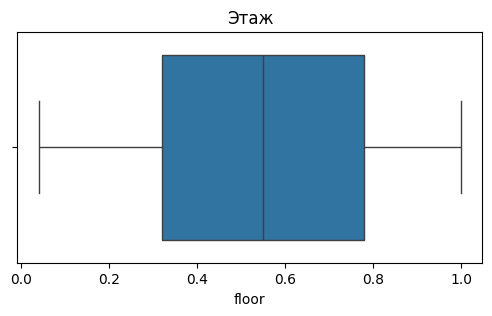

In [983]:
draw_boxplot(df, "total_area", "Жил-площадь")
draw_boxplot(df, "floor", "Этаж")

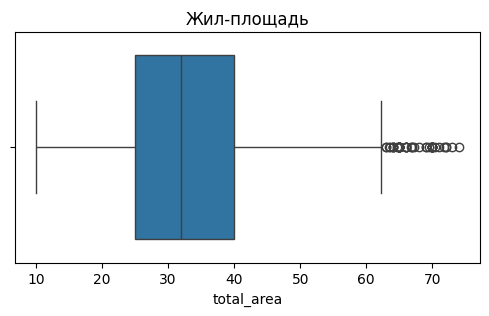

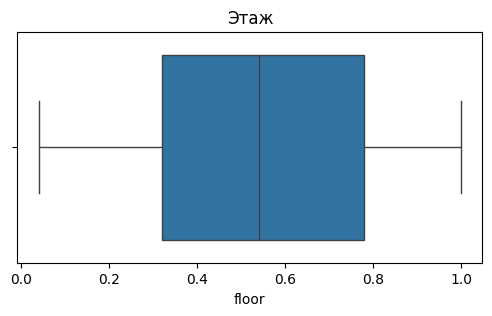

Отсечено строк: 39


In [988]:
df_clean = clip_by_percentile(df, "total_area", 0.97)

draw_boxplot(df_clean, "total_area", "Жил-площадь")
draw_boxplot(df_clean, "floor", "Этаж")

print("Отсечено строк:", len(df) - len(df_clean))

In [989]:
df = df_clean.copy()

## 2.3. Корреляция

In [993]:
REDFLAG_NAMES = ["flg", "cat", "cnt"]

number_cols = list(
    filter(lambda x: all([i not in x for i in REDFLAG_NAMES]), df.select_dtypes(include=np.number).columns)
)
number_cols

['price_per_month',
 'metro_nearest_time',
 'total_area',
 'floor',
 'utility_fixed_bill',
 'deposit',
 'comission']

In [994]:
def draw_corr_heatmap(df, cols):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляция")
    plt.show()
    return corr_matrix

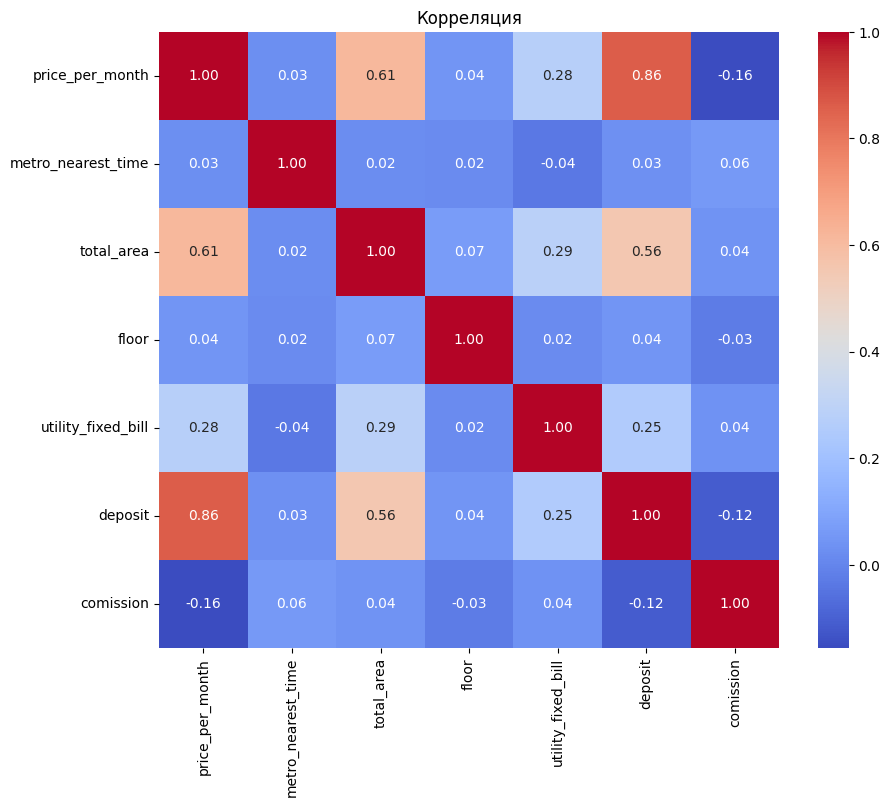

In [995]:
corr_matrix = draw_corr_heatmap(df, number_cols)

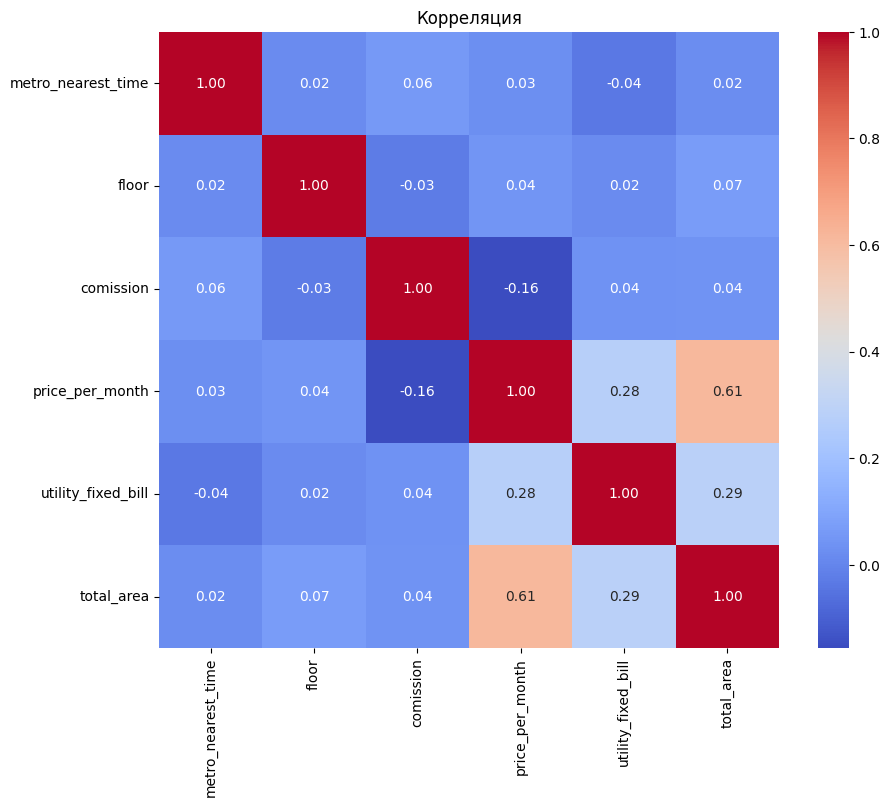

,metro_nearest_time,floor,comission,price_per_month,utility_fixed_bill,total_area
metro_nearest_time,1.000000,0.019367,0.056894,0.026591,-0.036934,0.020443
floor,0.019367,1.000000,-0.026679,0.043605,0.016315,0.065131
comission,0.056894,-0.026679,1.000000,-0.156372,0.037433,0.039458
price_per_month,0.026591,0.043605,-0.156372,1.000000,0.276997,0.614654
utility_fixed_bill,-0.036934,0.016315,0.037433,0.276997,1.000000,0.285270
total_area,0.020443,0.065131,0.039458,0.614654,0.285270,1.000000


In [996]:
CORR_THRESHOLD = 0.7
TARGET = "price_per_month"

big_correlation_columns = []
for col in corr_matrix.columns:
    if col != TARGET and abs(corr_matrix.loc[col, TARGET]) > CORR_THRESHOLD:
        if col in number_cols:
            big_correlation_columns.append(col)

draw_corr_heatmap(df, list(set(number_cols).difference(big_correlation_columns)))

In [997]:
big_correlation_columns

['deposit']

In [998]:
df.drop(columns=big_correlation_columns, inplace=True)

In [999]:
df_clean = df.copy()

## 2.4. Мультиколлинеарность

In [1000]:
def VIF(df):
    cols_names = df.select_dtypes(include=[np.number]).columns.tolist()
    cols_names_without_target = [c for c in cols_names if c not in TARGET]
    X = df[cols_names_without_target]
    X_with_const = add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    return vif_data.sort_values(by="VIF", ascending=False)

In [1001]:
VIF(df_clean)

,feature,VIF
0,const,103.960431
41,district_other_flg,5.794082
42,district_primorsky_flg,4.436983
37,district_krasnogvardeysky_flg,3.512309
35,house_type_monolithic_brick_flg,3.422864
43,district_vyborgsky_flg,3.304491
20,combined_bathrooms_cnt,3.240181
40,district_nevsky_flg,3.230915
21,separate_bathrooms_cnt,3.089059
38,district_krasnoselsky_flg,3.087369


видимо на этапе предварительного анализа были допущены ошибки, пройдемся по ним:

### 2.4.1. VIF для консьержа - NaN

In [195]:
df_clean["has_concierge_flg"].value_counts()

has_concierge_flg
0    4123
Name: count, dtype: int64

вероятно на каком-то из этапов данные по консьржам пропали совершенно, поэтому теперь этот столбец можно удалить насовсем

In [196]:
df_clean.drop(columns=["has_concierge_flg"], inplace=True)

### 2.4.2. house_type_<>_flg - inf!

а значит, была допущена ошибка при OHE - не был удален один из столбцов. удалим какой-нибудь:

In [197]:
df_clean.drop(columns=["house_type_brick_flg"], inplace=True)

### 2.4.3. Проверим еще раз

In [198]:
VIF(df_clean)

,feature,VIF
0,const,3270.195767
30,era_score,187.299596
5,district_frunzenskiy_flg,106.286346
13,district_vyborgsky_flg,90.544291
31,house_type_monolithic_flg,71.932394
11,district_primorsky_flg,67.082611
32,house_type_monolithic_brick_flg,61.202052
21,combined_bathrooms_cnt,59.233884
8,district_moskovsky_flg,54.834986
22,separate_bathrooms_cnt,52.799333


будем итеративно удалять фичи, пока VIF не упадет...

In [ ]:
df_vif = df_clean.copy()

VIF_WHITELIST = ["era_score", "total_area"]
removed_cols = []

while True:
    vif = VIF(df_vif)
    print(vif)

    choice = input("Фича для удаления: ")
    if choice == "stop":
        break
    elif choice == "":
        pos_for_check = 1
        while True:
            col_name = vif.iloc[pos_for_check]["feature"]
            if col_name in VIF_WHITELIST:
                pos_for_check += 1
            else:
                break
        curr_top = vif.iloc[pos_for_check]["VIF"]
    else:
        col_name = choice
        curr_top = vif[vif["feature"] == col_name].iloc[0]["VIF"]

    print(curr_top, col_name)

    if curr_top > 5:
        df_vif.drop(columns=[col_name], inplace=True)
        removed_cols.append(col_name)
    else:
        break

print(removed_cols)

                            feature          VIF
0                             const  3270.195767
30                        era_score   187.299596
5          district_frunzenskiy_flg   106.286346
13           district_vyborgsky_flg    90.544291
31        house_type_monolithic_flg    71.932394
11           district_primorsky_flg    67.082611
32  house_type_monolithic_brick_flg    61.202052
21           combined_bathrooms_cnt    59.233884
8            district_moskovsky_flg    54.834986
22           separate_bathrooms_cnt    52.799333
12     district_vasileostrovsky_flg    49.962155
2                        total_area    44.586041
1                metro_nearest_time    41.784727
35                     has_bath_flg    41.212186
6          district_kalininskiy_flg    39.999180
9               district_nevsky_flg    37.241997
20                   apartments_flg    34.476687
14               utility_fixed_bill    34.005140
18            prepayment_months_cnt    31.324482
15           utility

In [237]:
VIF(df_vif)

,feature,VIF
0,const,2254.322136
4,district_frunzenskiy_flg,18.104201
18,house_type_monolithic_flg,17.693534
12,district_vyborgsky_flg,16.087408
19,house_type_monolithic_brick_flg,13.298453
10,district_primorsky_flg,10.930656
7,district_moskovsky_flg,9.028975
13,repair_level,8.791910
5,district_kalininskiy_flg,8.678575
22,has_shower_flg,6.815453


In [238]:
df_vif.drop(columns=["has_shower_flg"], inplace=True)
VIF(df_vif)

,feature,VIF
0,const,2222.301600
4,district_frunzenskiy_flg,18.011849
18,house_type_monolithic_flg,17.660258
12,district_vyborgsky_flg,14.931874
19,house_type_monolithic_brick_flg,12.488570
10,district_primorsky_flg,10.849908
5,district_kalininskiy_flg,8.673342
7,district_moskovsky_flg,8.481577
13,repair_level,7.260792
8,district_nevsky_flg,6.252568


In [242]:
df_clean = df_vif.copy()
df = df_clean.copy()

df.info()

<class 'pandas.DataFrame'>
Index: 4123 entries, 0 to 4166
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_per_month                  4123 non-null   int64  
 1   total_area                       4123 non-null   float64
 2   floor                            4123 non-null   float64
 3   district_central_flg             4123 non-null   int64  
 4   district_frunzenskiy_flg         4123 non-null   int64  
 5   district_kalininskiy_flg         4123 non-null   int64  
 6   district_krasnogvardeysky_flg    4123 non-null   int64  
 7   district_moskovsky_flg           4123 non-null   int64  
 8   district_nevsky_flg              4123 non-null   int64  
 9   district_other_flg               4123 non-null   int64  
 10  district_primorsky_flg           4123 non-null   int64  
 11  district_vasileostrovsky_flg     4123 non-null   int64  
 12  district_vyborgsky_flg           412

## 2.5. Визуализация цен по районам

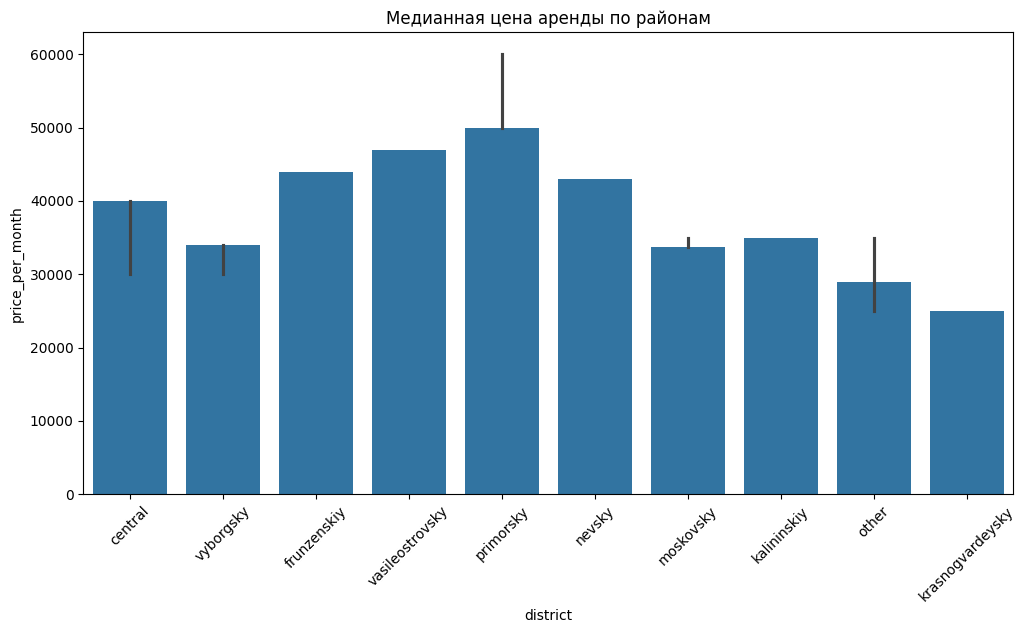

In [245]:
districts = [col for col in df.columns if "district_" in col]

df_viz = df.copy()
df_viz["district"] = df_viz[districts].idxmax(axis=1).apply(lambda x: x.replace("district_", "").replace("_flg", ""))

plt.figure(figsize=(12, 6))
sns.barplot(x="district", y="price_per_month", data=df_viz, estimator=np.median)
plt.xticks(rotation=45)
plt.title("Медианная цена аренды по районам")
plt.show()

## 2.6. Удаление дубликатов

In [262]:
duplicates = df[df.duplicated(keep=False)]
print(f"Количество полных дубликатов: {len(duplicates)}")
print(f"Всего данных: {len(df)}")

Количество полных дубликатов: 4085
Всего данных: 4123


# 3. Линрег

In [246]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=["price_per_month"])
y = df_clean["price_per_month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (3298, 28)
Тестовая выборка: (825, 28)


In [247]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

baseline_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)


def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"MAE (Средняя ошибка в рублях): {mae:,.0f} ₽")
    print(f"MAPE (Ошибка в процентах):     {mape:.2%}")
    print(f"R2 Score (Коэф. детерминации): {r2:.4f}")


evaluate_model(y_test, y_pred_baseline, "Baseline (Ridge)")

--- Baseline (Ridge) Performance ---
MAE (Средняя ошибка в рублях): 1,625 ₽
MAPE (Ошибка в процентах):     4.23%
R2 Score (Коэф. детерминации): 0.9598


In [251]:
errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_baseline})
errors['Diff'] = (errors['Actual'] - errors['Predicted']).abs()
print(errors.sort_values(by='Diff', ascending=False).head(40))

      Actual     Predicted          Diff
4028   53000  23114.887189  29885.112811
4050   65000  41285.620025  23714.379975
4039   34000  56580.978342  22580.978342
4062   35000  15658.179589  19341.820411
193    38500  19861.190348  18638.809652
3529   50000  68005.115488  18005.115488
207    35000  51741.698659  16741.698659
2020   32000  48253.781954  16253.781954
3125   43000  26967.631192  16032.368808
404    37990  52068.015177  14078.015177
1888   38000  24825.264945  13174.735055
195    28000  15207.159091  12792.840909
1883   28000  15207.159091  12792.840909
3126   21000   8340.585308  12659.414692
1874   33000  22992.018776  10007.981224
1882   45000  35347.756123   9652.243877
213    45000  36203.742895   8796.257105
1570   29500  38176.078258   8676.078258
732    29500  38176.078258   8676.078258
2575   29500  38176.078258   8676.078258
3069   29500  38176.078258   8676.078258
2484   29500  38176.078258   8676.078258
3695   29500  38176.078258   8676.078258
2427   29500  38

In [256]:
print(df.duplicated().any())

True


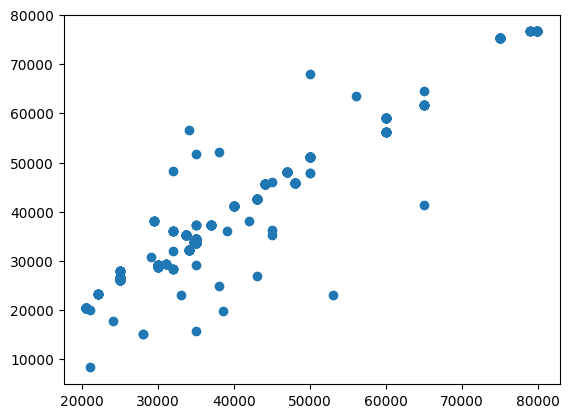

In [253]:
plt.scatter(y_test, y_pred_baseline)

In [252]:
coeffs = pd.DataFrame({
    'feature': X.columns,
    'coef': baseline_model.named_steps['ridge'].coef_
}).sort_values(by='coef', ascending=False)
print(coeffs)

                            feature          coef
0                        total_area  11831.120941
12                     repair_level   5996.311346
18  house_type_monolithic_brick_flg   5941.586591
17        house_type_monolithic_flg   3866.597879
21                 has_internet_flg   3530.800299
13            freight_elevators_cnt   3157.741962
20    floor_reinforced_concrete_flg   3099.640705
22           has_room_furniture_flg   2814.387812
26                       has_tv_flg   2811.899905
19             house_type_panel_flg   2140.842415
25                   has_washer_flg   1599.572823
3          district_frunzenskiy_flg   1104.697275
14                    parking_level    479.511195
16                       loggia_cnt    400.523260
10     district_vasileostrovsky_flg   -212.676256
27                   has_fridge_flg   -402.542212
2              district_central_flg   -799.499872
23        has_kitchen_furniture_flg  -1284.865988
15                      balcony_cnt  -2165.522139
